In [ ]:
!pip install sdv

     |████████████████████████████████| 101 kB 3.9 MB/s 
     |████████████████████████████████| 46 kB 2.3 MB/s 
     |████████████████████████████████| 45 kB 1.9 MB/s 
     |████████████████████████████████| 1.2 MB 38.0 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 97 kB 6.3 MB/s 
     |████████████████████████████████| 11.2 MB 20.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 899 kB 44.3 MB/s 
     |████████████████████████████████| 636 kB 41.2 MB/s 
     |████████████████████████████████| 280 kB 41.8 MB/s 
     |████████████████████████████████| 2.5 MB 40.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting un

In [ ]:
!pip uninstall numpy

Found existing installation: numpy 1.21.5
Uninstalling numpy-1.21.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.5


In [ ]:
!pip install numpy

     |████████████████████████████████| 15.7 MB 368 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving real_inds.csv to real_inds.csv


In [ ]:
!pip install table_evaluator

In [ ]:
from sdv.tabular import CTGAN
from sdv.demo import load_tabular_demo
from sdv.evaluation import evaluate
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io
import sys
from termcolor import colored, cprint


In [ ]:
#inds = pd.read_csv(io.BytesIO(uploaded['inds.csv']))
inds = pd.read_csv(io.BytesIO(uploaded['real_inds.csv']))
#cons = pd.read_csv(io.BytesIO(uploaded['cons.csv']))
#cons = pd.read_csv(io.BytesIO(uploaded['cons.csv']))
inds.head()

,id,age,sex,emp,mob,inc,cit,mar,sch,dis,wrk,ins,rce
0,1,a.50.59,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,with.disability,not.working,with.insurance,black
1,2,a.60.69,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,without.disability,not.working,with.insurance,black
2,3,a.70.79,m,not.in.labor.force,same.house,i.0.9999,us.born,married,no.schooling,with.disability,not.working,with.insurance,white
3,4,a.60.69,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,without.disability,not.working,with.insurance,black
4,5,a.80.89,f,not.in.labor.force,same.house,i.0.9999,us.born,widowed,no.schooling,with.disability,not.working,with.insurance,white


In [ ]:
inds

,id,age,sex,emp,mob,inc,cit,mar,sch,dis,wrk,ins,rce
0,1,a.50.59,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,with.disability,not.working,with.insurance,black
1,2,a.60.69,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,without.disability,not.working,with.insurance,black
2,3,a.70.79,m,not.in.labor.force,same.house,i.0.9999,us.born,married,no.schooling,with.disability,not.working,with.insurance,white
3,4,a.60.69,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,without.disability,not.working,with.insurance,black
4,5,a.80.89,f,not.in.labor.force,same.house,i.0.9999,us.born,widowed,no.schooling,with.disability,not.working,with.insurance,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,13049,a.70.79,m,not.in.labor.force,same.house,i.0.9999,us.born,married,no.schooling,without.disability,local,with.insurance,white
13049,13050,a.70.79,f,not.in.labor.force,same.house,i.0.9999,us.born,married,no.schooling,without.disability,not.working,with.insurance,white
13050,13051,a.70.79,f,civilian.employed,same.house,i.35000.49999,us.born,divorced,no.schooling,without.disability,private.profit,with.insurance,white
13051,13052,a.70.79,m,not.in.labor.force,same.house,i.0.9999,naturalization,widowed,no.schooling,without.disability,not.working,with.insurance,asian


In [ ]:
#inds.drop(, axis = 1)
inds = inds.drop(columns = ['id'])
#inds['AGE'] = inds['AGE'].replace(['0_9','10_19','20_29','30_39','40_49','50_59','60_69','70_79','80_89','90_99'],[5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

In [ ]:
inds.head()

,age,sex,emp,mob,inc,cit,mar,sch,dis,wrk,ins,rce
0,a.50.59,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,with.disability,not.working,with.insurance,black
1,a.60.69,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,without.disability,not.working,with.insurance,black
2,a.70.79,m,not.in.labor.force,same.house,i.0.9999,us.born,married,no.schooling,with.disability,not.working,with.insurance,white
3,a.60.69,m,not.in.labor.force,same.house,i.0.9999,us.born,never,no.schooling,without.disability,not.working,with.insurance,black
4,a.80.89,f,not.in.labor.force,same.house,i.0.9999,us.born,widowed,no.schooling,with.disability,not.working,with.insurance,white


In [ ]:
for name in inds.columns:
  print("\033[1;32m " + name + "\033[_")
  print(inds[name].unique())

for name in inds.columns:
   print()

 age[_
['a.50.59' 'a.60.69' 'a.70.79' 'a.80.89' 'a.20.29' 'a.40.49' 'a.30.39'
 'a.10.19' 'a.0.9']
 sex[_
['m' 'f']
 emp[_
['not.in.labor.force' 'civilian.employed' 'unemployed' 'armed.forces']
 mob[_
['same.house' 'diff.us.house' 'abroad.house']
 inc[_
['i.0.9999' 'i.25000.34999' 'i.50000.64999' 'i.15000.24999'
 'i.75000.99999' 'i.65000.74999' 'i.35000.49999' 'i.10000.14999']
 cit[_
['us.born' 'naturalization' 'abroad.born' 'not.citizen' 'puerto.rico.born']
 mar[_
['never' 'married' 'widowed' 'divorced' 'separated']
 sch[_
['no.schooling' 'public' 'private']
 dis[_
['with.disability' 'without.disability']
 wrk[_
['not.working' 'private.profit' 'private.no.profit'
 'self.employed.no.corp' 'local' 'self.employed.corp' 'federal' 'state']
 ins[_
['with.insurance' 'without.insurance']
 rce[_
['black' 'white' 'asian' 'two' 'other']














In [ ]:
model = CTGAN(verbose= True)
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")
  model.fit(inds)
model.save('model.pkl')

Epoch 1, Loss G:  0.6558,Loss D: -0.4654
Epoch 2, Loss G:  0.4434,Loss D:  0.2055
Epoch 3, Loss G:  0.4105,Loss D:  0.0224
Epoch 4, Loss G:  0.2828,Loss D: -0.0507
Epoch 5, Loss G:  0.2165,Loss D: -0.0165
Epoch 6, Loss G:  0.1927,Loss D:  0.0506
Epoch 7, Loss G:  0.0058,Loss D:  0.1505
Epoch 8, Loss G:  0.0205,Loss D: -0.0749
Epoch 9, Loss G: -0.1391,Loss D: -0.0077
Epoch 10, Loss G: -0.1276,Loss D: -0.0243
Epoch 11, Loss G: -0.2014,Loss D:  0.0273
Epoch 12, Loss G: -0.2735,Loss D: -0.1412
Epoch 13, Loss G: -0.2635,Loss D: -0.0568
Epoch 14, Loss G: -0.3510,Loss D: -0.2046
Epoch 15, Loss G: -0.5166,Loss D: -0.1008
Epoch 16, Loss G: -0.6622,Loss D: -0.1269
Epoch 17, Loss G: -0.6953,Loss D: -0.1233
Epoch 18, Loss G: -0.6474,Loss D: -0.1752
Epoch 19, Loss G: -0.8690,Loss D:  0.0068
Epoch 20, Loss G: -0.8467,Loss D: -0.1461
Epoch 21, Loss G: -1.0398,Loss D:  0.0462
Epoch 22, Loss G: -0.8761,Loss D: -0.1487
Epoch 23, Loss G: -0.7932,Loss D: -0.2048
Epoch 24, Loss G: -0.5399,Loss D: -0.3145
E

In [ ]:
loaded = CTGAN.load('model.pkl')
samdata = loaded.sample(13053)
samdata

,age,sex,emp,mob,inc,cit,mar,sch,dis,wrk,ins,rce
0,a.50.59,f,civilian.employed,diff.us.house,i.25000.34999,not.citizen,married,no.schooling,without.disability,private.profit,with.insurance,asian
1,a.50.59,m,civilian.employed,diff.us.house,i.75000.99999,us.born,married,no.schooling,without.disability,private.profit,with.insurance,white
2,a.10.19,m,not.in.labor.force,same.house,i.0.9999,naturalization,never,public,without.disability,not.working,with.insurance,white
3,a.50.59,f,civilian.employed,same.house,i.75000.99999,us.born,never,public,without.disability,federal,with.insurance,white
4,a.0.9,m,not.in.labor.force,same.house,i.75000.99999,us.born,never,public,without.disability,not.working,with.insurance,asian
...,...,...,...,...,...,...,...,...,...,...,...,...
13048,a.50.59,f,civilian.employed,diff.us.house,i.75000.99999,naturalization,never,no.schooling,without.disability,private.profit,with.insurance,two
13049,a.50.59,f,civilian.employed,same.house,i.75000.99999,us.born,divorced,no.schooling,without.disability,state,with.insurance,white
13050,a.70.79,f,not.in.labor.force,diff.us.house,i.0.9999,us.born,married,no.schooling,with.disability,not.working,with.insurance,white
13051,a.70.79,f,not.in.labor.force,same.house,i.75000.99999,us.born,married,no.schooling,without.disability,not.working,with.insurance,white


In [ ]:
samdata = samdata.drop(columns = ['PWGTP1', 'SPORDER'])

In [ ]:

evaluate(samdata, inds)

/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

0.5926091997517288

In [ ]:
#cat_cols = ['AGE', 'SEX', 'RACE']
table_evaluator = TableEvaluator(inds, samdata)

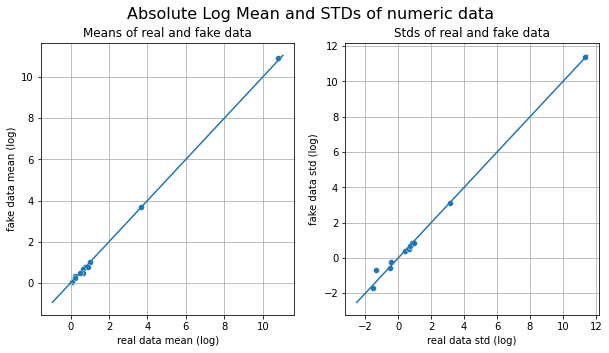

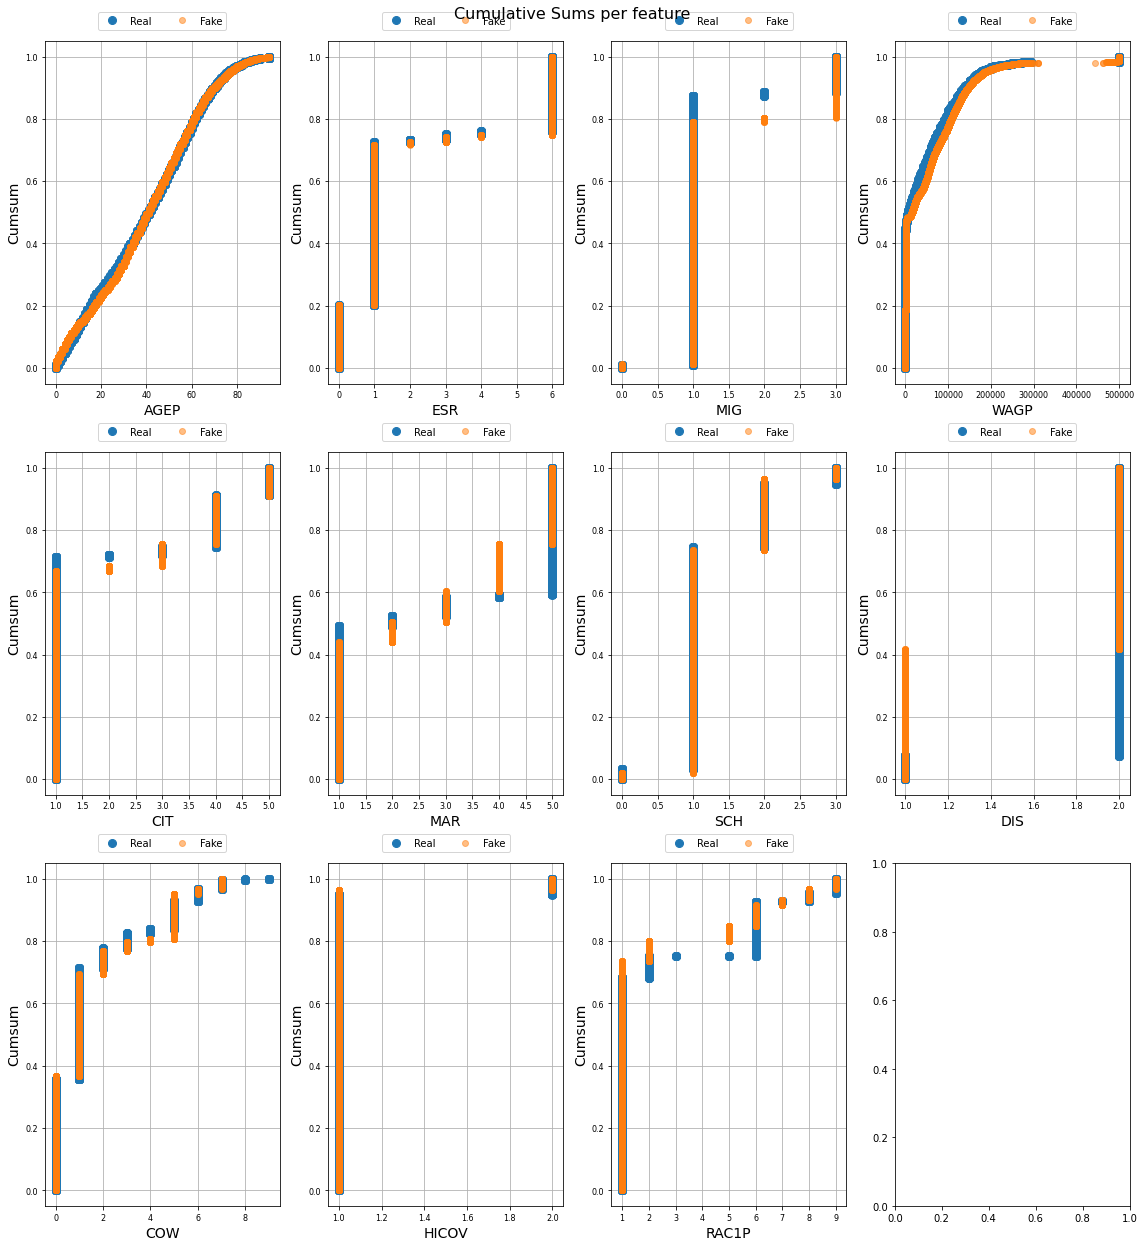

ValueError: ignored

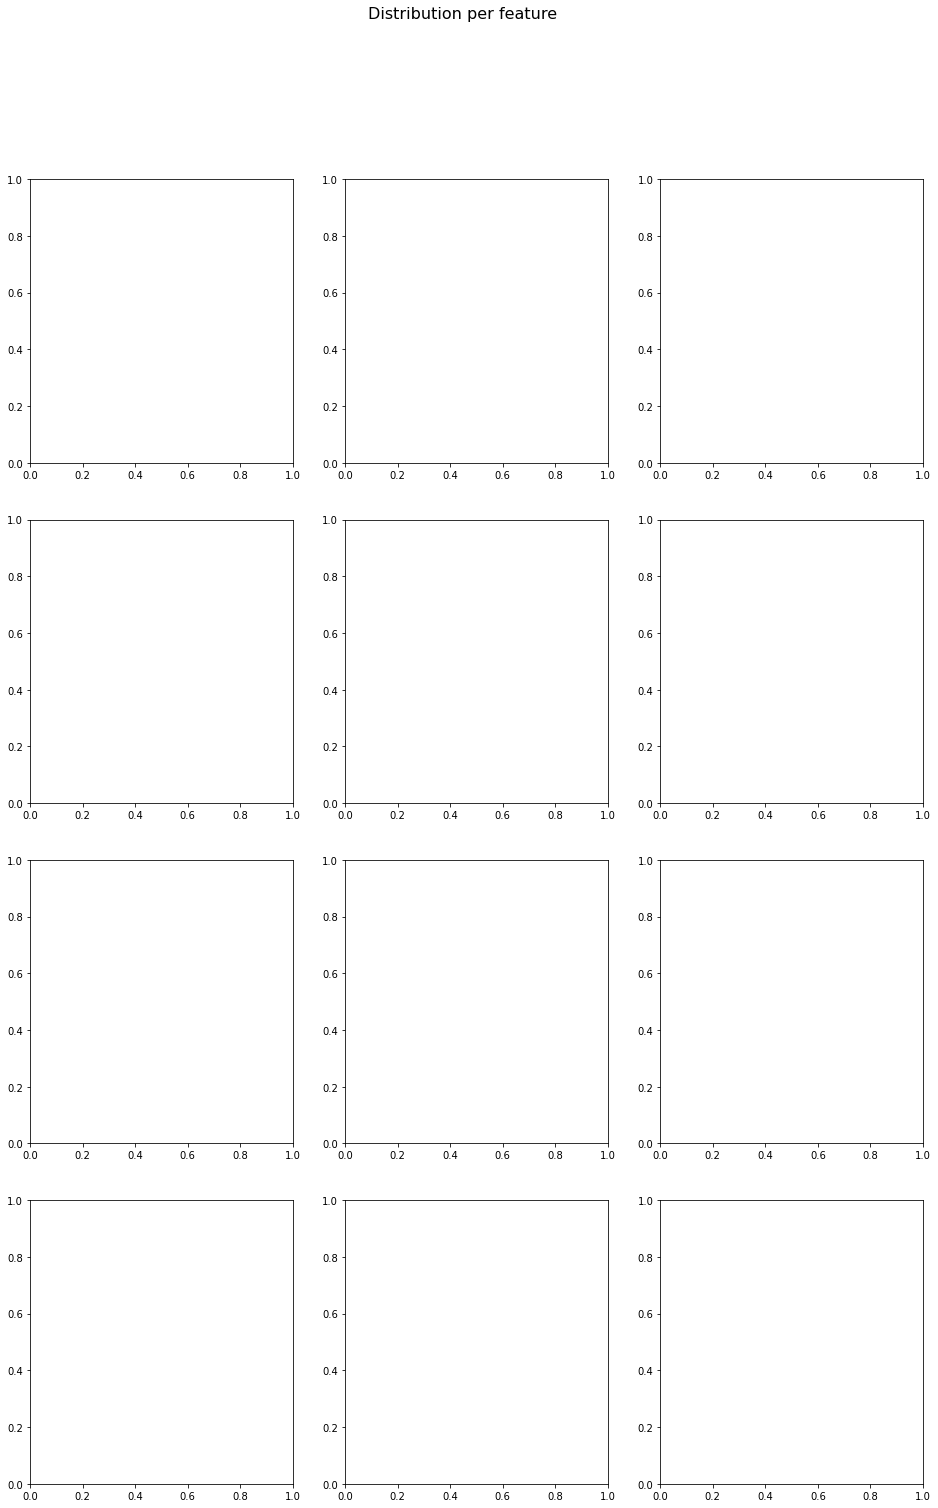

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:


table_evaluator.evaluate('AGEP')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0295   0.0303              0.0165
DecisionTreeClassifier_real   0.0866   0.0341              0.0288
LogisticRegression_fake       0.0157   0.0230              0.0000
LogisticRegression_real       0.0314   0.0268              0.0000
MLPClassifier_fake            0.0207   0.0272              0.0042
MLPClassifier_real            0.0797   0.0349              0.0160
RandomForestClassifier_fake   0.0341   0.0333              0.0167
RandomForestClassifier_real   0.0915   0.0372              0.0225

Privacy results:
                                              result
Duplicate rows between sets (real/fake)  (4683, 840)
nearest neighbor mean                         0.4791
nearest neighbor std                          0.3539

Miscellaneous results:
                               

In [ ]:
!pip install tab_gan_metrics


In [ ]:
from tab_gan_metrics import load_data, TableEvaluator


In [ ]:
samdata.to_csv('synthetic.csv')
from google.colab import files
files.download('synthetic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>